In [1]:
'''
Set path to the folder of used python files
'''
import sys
sys.path.insert(0, '/Users/lynnjiang/liuGit/Pybook/Clinic-Analysis/Scripts/Data_Cleaning')
from Abstract import Abstract

In [10]:

import pandas as pd
import numpy as np


class Diagnosis(Abstract):
    def __init__(self):
        super().__init__()

    # Pick data of specific diseases from diagnoses data
    # 4280 Congestive heart failure
    def get_diagnosesDf(self):
        
        diagnosis_df = self.read_data('DIAGNOSES_ICD')
        diagnosis_df=diagnosis_df.dropna(subset=['ICD9_CODE'])
        return diagnosis_df


dd = Diagnosis()
# dd.write2file(dd.get_labels(),'diagnosis_label_4280')
# all_diagnoses = dd.get_labels()
# selected_user_list = dd.read_data('temp/PATIENTS_5_PER')
# dd.write2file(dd.left_join(selected_user_list,all_diagnoses,'SUBJECT_ID'),'selected_diagnoses')

In [11]:
all_diagnoses = dd.get_diagnosesDf()

In [16]:
all_diagnoses['VALUE']=1
all_diagnoses.head()

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,VALUE
0,1297,109,172335,1.0,40301,1
1,1298,109,172335,2.0,486,1
2,1299,109,172335,3.0,58281,1
3,1300,109,172335,4.0,5855,1
4,1301,109,172335,5.0,4254,1


In [ ]:
## Remained codes, count of entries
# user_diag_vec = pd.pivot_table(diagnoses_countdf, index=['SUBJECT_ID'], columns=['ICD9_CODE'],values=['count'])
# diagnoses_countdf = all_diagnoses.groupby(['SUBJECT_ID','ICD9_CODE'])['SUBJECT_ID'].count().reset_index(name="count").sort_values(by='count',ascending=False)

In [17]:
user_diag_vec = pd.pivot_table(all_diagnoses, index=['SUBJECT_ID'], columns=['ICD9_CODE'],values=['VALUE'])
user_diag_vec.head()

VALUE                                                ...         \
ICD9_CODE   0030 0031 0038 0039 0041 0048 0049 0051 00581 0059  ...  V8801   
SUBJECT_ID                                                      ...          
2            NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...    NaN   
3            NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...    NaN   
4            NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...    NaN   
5            NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...    NaN   
6            NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...    NaN   

                                                                 
ICD9_CODE  V8811 V8812 V8821 V9010 V902 V9039 V9081 V9089 V9103  
SUBJECT_ID                                                       
2            NaN   NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN  
3            NaN   NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN  
4            NaN   NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN  
5            NaN   NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN  
6            NaN   NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN  

[5 rows x 6984 columns]

In [59]:
user_diag_vec=user_diag_vec.reset_index()
# test.columns = test.columns.droplevel()
# # test.reset_index()
# # test.head()
user_diag_vec.head()

ICD9_CODE,SUBJECT_ID,0030,0031,0038,0039,0041,0048,0049,0051,00581,...,V8801,V8811,V8812,V8821,V9010,V902,V9039,V9081,V9089,V9103
0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
## fill na with zeros
user_diag_vec= user_diag_vec.fillna(0)
user_diag_vec.head()

VALUE                                                ...         \
ICD9_CODE   0030 0031 0038 0039 0041 0048 0049 0051 00581 0059  ...  V8801   
SUBJECT_ID                                                      ...          
2            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0   
3            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0   
4            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0   
5            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0   
6            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0   

                                                                 
ICD9_CODE  V8811 V8812 V8821 V9010 V902 V9039 V9081 V9089 V9103  
SUBJECT_ID                                                       
2            0.0   0.0   0.0   0.0  0.0   0.0   0.0   0.0   0.0  
3            0.0   0.0   0.0   0.0  0.0   0.0   0.0   0.0   0.0  
4            0.0   0.0   0.0   0.0  0.0   0.0   0.0   0.0   0.0  
5            0.0   0.0   0.0   0.0  0.0   0.0   0.0   0.0   0.0  
6            0.0   0.0   0.0   0.0  0.0   0.0   0.0   0.0   0.0  

[5 rows x 6984 columns]

In [70]:
dd.write2file(user_diag_vec,'USER_VECTORS/diagnoses_uservectors')

## Read user vectors from file and run cluster analysis

In [19]:
# user_diag_vec = dd.read_data('temp/USER_VECTORS/diagnoses_uservectors')
user_diag_vec.head()

VALUE                                                ...         \
ICD9_CODE   0030 0031 0038 0039 0041 0048 0049 0051 00581 0059  ...  V8801   
SUBJECT_ID                                                      ...          
2            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0   
3            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0   
4            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0   
5            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0   
6            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0   

                                                                 
ICD9_CODE  V8811 V8812 V8821 V9010 V902 V9039 V9081 V9089 V9103  
SUBJECT_ID                                                       
2            0.0   0.0   0.0   0.0  0.0   0.0   0.0   0.0   0.0  
3            0.0   0.0   0.0   0.0  0.0   0.0   0.0   0.0   0.0  
4            0.0   0.0   0.0   0.0  0.0   0.0   0.0   0.0   0.0  
5            0.0   0.0   0.0   0.0  0.0   0.0   0.0   0.0   0.0  
6            0.0   0.0   0.0   0.0  0.0   0.0   0.0   0.0   0.0  

[5 rows x 6984 columns]

In [20]:
from sklearn.cluster import KMeans
from collections import Counter
# import matplotlib.pyplot as plt
# pl.figure('Reference Plot')
# # pl.scatter(pca_2d[:, 0], pca_2d[:, 1], c=iris.target)
kmeans = KMeans(n_clusters=3)
kmeans.fit(user_diag_vec.iloc[:,1:])
Counter(kmeans.labels_)


Counter({2: 7504, 0: 11165, 1: 27848})

In [23]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt
pca = PCA(n_components=2).fit(user_diag_vec.iloc[:,1:])
pca_2d = pca.transform(user_diag_vec.iloc[:,1:])
plt.figure('K-means with 3 clusters')
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=kmeans.labels_)
plt.show()

<Figure size 640x480 with 1 Axes>

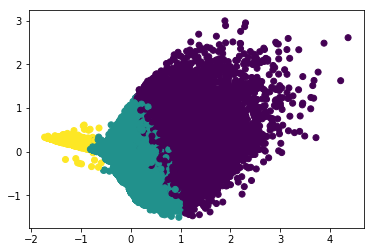

In [24]:
plt.figure('K-means with 3 clusters')
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=kmeans.labels_)
plt.show()